# VIrtual Cloths try ON
Instead of using a single algorithm we are combining Multiple algorithms for best results
We are using HR-Viton,Detectron,Posenet as well as Graphonomy

# 1.Setup
Make sure you selected GPU runtime in google colab

In [1]:
# clone repository
!git clone https://github.com/krishnakumarbhat/TryYours-Virtual-Try-On

# install dependencies
!pip install tensorboardX av torchgeometry flask flask-ngrok iglovikov_helper_functions cloths_segmentation albumentations
!pip install scipy==1.8.0

%cd TryYours-Virtual-Try-On
# install detectron2
!python -m pip install 'git+https://github.com/krishnakumarbhat/detectron2.git'

Cloning into 'TryYours-Virtual-Try-On'...
remote: Enumerating objects: 1117, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 1117 (delta 5), reused 11 (delta 3), pack-reused 1100
Receiving objects: 100% (1117/1117), 22.21 MiB | 19.98 MiB/s, done.
Resolving deltas: 100% (199/199), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 99.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 2. Downloading model weights

In [2]:
!pip install --upgrade --no-cache-dir gdown

%cd HR-VITON-main
!gdown https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&export=download
!gdown https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&export=download
%cd ../

%cd Graphonomy-master
!gdown https://drive.google.com/u/0/uc?id=1eUe18HoH05p0yFUd_sN6GXdTj82aW0m9&export=download
%cd ../

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/content/TryYours-Virtual-Try-On/HR-VITON-main
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy
From (redirected): https://drive.google.com/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&confirm=t&uuid=394eb958-efb0-4dc3-bdfc-d466f3925bde
To: /content/TryYours-Virtual-Try-On/HR-VITON-main/gen.pth
100% 402M/402M [00:06<00:00, 61.3MB/s]
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ
From (redirected): https://drive.google.com/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&confirm=t&uuid=840aa5d0-68ec-4f8c-bf56-fd7e747eef67
To: /content/TryYours-Virtual-Try-On/HR-VITON-main/mtviton.pth
100% 190M/190M [00:07<00:00, 25.9MB/s]
/content/TryYours-Virtual-Try-On
/content/TryYours-Virtual-Try-On/Graphonomy-master
Downloading...
From (uriginal): https://drive.g

In [3]:
%ls
%pwd

Demo.ipynb         get_seg_grayscale.py  posenet_models/  TryYours_presentation_kr.pdf
detectron2/        Graphonomy-master/    posenet.py       webserver.py
figures/           HR-VITON-main/        README.md
get_cloth_mask.py  main.py               static/
get_densepose.py   posenet/              templates/


'/content/TryYours-Virtual-Try-On'

# 3. Upload Cloth Images
Either use sample images or upload other cloth images

In [11]:
import cv2
import numpy as np
import os
import shutil
from google.colab import files

# Specify the input directory for uploaded images
input_dir = '/content/TryYours-Virtual-Try-On/static'

# Upload the image
uploaded = files.upload()

# Move the uploaded file to the input directory
for filename in uploaded.keys():
    input_path = os.path.join(input_dir, filename)
    shutil.move(filename, input_path)

# Read the uploaded image
image = cv2.imread(input_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a threshold to create a binary mask
_, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

# Invert the colors in the mask
mask = cv2.bitwise_not(mask)

# Specify the output directory and filename for the mask
output_dir_mask = '/content/TryYours-Virtual-Try-On/HR-VITON-main/test/test/cloth-mask'
output_filename_mask = '00001_00.jpg'

# Save the mask to the specified directory and filename
cv2.imwrite(os.path.join(output_dir_mask, output_filename_mask), mask)

# Remove existing 'cloth_web.jpg' and rename the uploaded file to 'cloth_web.jpg'
os.remove(os.path.join(input_dir, 'cloth_web.jpg'))
os.rename(input_path, os.path.join(input_dir, 'cloth_web.jpg'))

# Specify the directory where you want to copy 'cloth_web.jpg'
output_dir_cloth = '/content/TryYours-Virtual-Try-On/HR-VITON-main/test/test/cloth'
output_filename_cloth = '00001_00.jpg'

# Copy 'cloth_web.jpg' to the output directory with the desired name, replacing if exists
shutil.copy(os.path.join(input_dir, 'cloth_web.jpg'), os.path.join(output_dir_cloth, output_filename_cloth))


Saving 00001_00.jpg to 00001_00.jpg


'/content/TryYours-Virtual-Try-On/HR-VITON-main/test/test/cloth/00001_00.jpg'

# 4. Upload Person Images
Either use sample images or upload your images

In [5]:
import torch
from torch import nn

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
#adding resnet
class ImageFeatureExtractor(nn.Module):

    def __init__(self):
        super(ImageFeatureExtractor, self).__init__()

        # Convolutional layers.
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)

        # Pooling layers.
        self.pool1 = nn.MaxPool2d(2, 2)
        self.pool2 = nn.MaxPool2d(2, 2)

        # Fully connected layers.
        self.fc1 = nn.Linear(256 * 7 * 7, 4096)
        self.fc2 = nn.Linear(4096, 100)

    def forward(self, image):
        # Forward pass through the CNN.
        features = F.relu(self.conv1(image))
        features = self.pool1(features)
        features = F.relu(self.conv2(features))
        features = self.pool2(features)
        features = F.relu(self.conv3(features))

        # Flatten the features.
        features = features.view(-1, 256 * 7 * 7)

        # Forward pass through the fully connected layers.
        features = F.relu(self.fc1(features))
        features = F.dropout(features, 0.5)
        features = self.fc2(features)

        return features

def train_image_feature_extractor(model, dataset, optimizer, loss_fn, epochs):
    # Train the image feature extractor for the specified number of epochs.
    for epoch in range(epochs):
        for images, labels in dataset:
            # Forward pass.
            features = model(images)

            # Compute the loss.
            loss = loss_fn(features, labels)

            # Backward pass and update the model parameters.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


image_feature_extractor = ImageFeatureExtractor()
optimizer = torch.optim.Adam(image_feature_extractor.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()


# Preprocess the image features and the other inputs to the HR-viton using resnet
other_inputs = torch.zeros((1, 100))

pid = ('plaid', 3, 5)
ogids = [('print', 2, 5)]




In [6]:
  # Uncomment the following block if you would like to upload your own images.

input_dir = '/content/TryYours-Virtual-Try-On/static'
uploaded = files.upload()
for filename in uploaded.keys():
    input_path = os.path.join(input_dir, filename)
    shutil.move(os.path.join(os.getcwd(), filename), input_path)

os.remove(input_dir+'/origin_web.jpg')
os.rename(input_path, input_dir+'/origin_web.jpg')

Saving person.png to person.png


# 5. Check Images
check image uploaded successfully

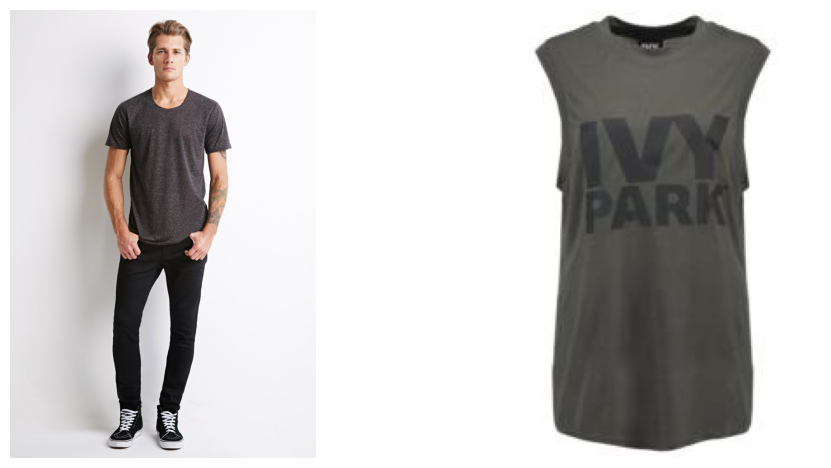

In [12]:
import matplotlib.pyplot as plt
import cv2


original = cv2.cvtColor(cv2.imread("./static/origin_web.jpg"), cv2.COLOR_BGR2RGB)
cloth = cv2.cvtColor(cv2.imread("./static/cloth_web.jpg"), cv2.COLOR_BGR2RGB)
## Display Images
fig, axes = plt.subplots(nrows=1, ncols=2)
dpi = fig.get_dpi()
fig.set_size_inches(900/ dpi, 448 / dpi)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
axes[0].axis('off')
axes[0].imshow(original)
axes[1].axis('off')
axes[1].imshow(cloth)
plt.show()

# 6. RUN CODE





In [13]:
# !python main.py #--background False
!python /content/TryYours-Virtual-Try-On/main.py

Get mask of cloth

Traceback (most recent call last):
  File "/content/TryYours-Virtual-Try-On/get_cloth_mask.py", line 39, in <module>
    img[int((1024-shape[0])/2): 1024-int((1024-shape[0])/2),int((768-shape[1])/2):768-int((768-shape[1])/2)]=b
ValueError: could not broadcast input array from shape (307,230,3) into shape (308,230,3)
Get openpose coordinate using posenet

Generate semantic segmentation using Graphonomy-Master library

Constructing DeepLabv3+ model...
Number of classes: 20
Output stride: 16
Number of Input Channels: 3
load model: ./inference.pth
time used for the multi-scale image inference is :2.8936396650000233

Generate Densepose image using detectron2 library

[11/17 05:24:11 apply_net]: Loading config from detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml
[11/17 05:24:11 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[11/17 05:24:13 apply_net]: Loading data f

# 7. View Results

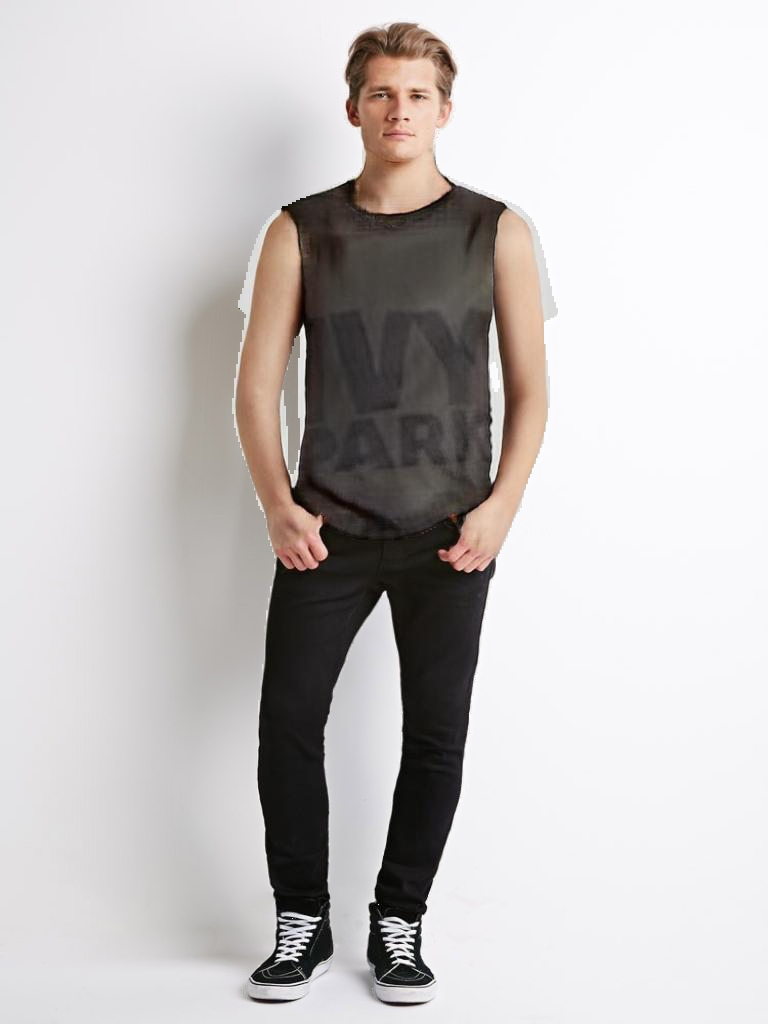

In [14]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename="/content/TryYours-Virtual-Try-On/static/finalimg.png")
display(image1)

In [15]:
from flask import Flask, send_file
import os
!pip install pyngrok==4.1.1
!pip install flask_ngrok
from flask import Flask, request, render_template
from flask_ngrok import run_with_ngrok
from werkzeug.utils import secure_filename
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template


!ngrok authtoken 2YFDH0GoyCX5qKEjG98QOjTHIz7_83TJZsB8wXf8PPzmfp5yL





  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15964 sha256=47b7a306645e00b2b54d906af40720844643cc48c6138d9fccac68f0fcd08211
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from flask import Flask, request, redirect, url_for
from flask_ngrok import run_with_ngrok
import os
import subprocess
from werkzeug.utils import secure_filename
import cv2
import shutil

app = Flask(__name__)
run_with_ngrok(app)

# Set the upload folder
upload_folder = '/content/TryYours-Virtual-Try-On/static'
app.config['UPLOAD_FOLDER'] = upload_folder
up_folder = '/content/TryYours-Virtual-Try-On/HR-VITON-main/test/test/cloth'
app.config['UP_FOLDER'] = up_folder

# Define allowed file extensions
ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg', 'gif'}

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

def save_file(file, folder, filename):
    file_path = os.path.join(folder, filename)

    # Check if the file already exists
    if os.path.exists(file_path):
        # Remove the existing file
        os.remove(file_path)

    # Save the new file
    file.save(file_path)

    return file_path

import torch
from torch import nn

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
#adding resnet
class ImageFeatureExtractor(nn.Module):

    def __init__(self):
        super(ImageFeatureExtractor, self).__init__()

        # Convolutional layers.
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)

        # Pooling layers.
        self.pool1 = nn.MaxPool2d(2, 2)
        self.pool2 = nn.MaxPool2d(2, 2)

        # Fully connected layers.
        self.fc1 = nn.Linear(256 * 7 * 7, 4096)
        self.fc2 = nn.Linear(4096, 100)

    def forward(self, image):
        # Forward pass through the CNN.
        features = F.relu(self.conv1(image))
        features = self.pool1(features)
        features = F.relu(self.conv2(features))
        features = self.pool2(features)
        features = F.relu(self.conv3(features))

        # Flatten the features.
        features = features.view(-1, 256 * 7 * 7)

        # Forward pass through the fully connected layers.
        features = F.relu(self.fc1(features))
        features = F.dropout(features, 0.5)
        features = self.fc2(features)

        return features

def train_image_feature_extractor(model, dataset, optimizer, loss_fn, epochs):
    # Train the image feature extractor for the specified number of epochs.
    for epoch in range(epochs):
        for images, labels in dataset:
            # Forward pass.
            features = model(images)

            # Compute the loss.
            loss = loss_fn(features, labels)

            # Backward pass and update the model parameters.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


image_feature_extractor = ImageFeatureExtractor()
optimizer = torch.optim.Adam(image_feature_extractor.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()


# Preprocess the image features and the other inputs to the HR-viton using resnet
other_inputs = torch.zeros((1, 100))

pid = ('plaid', 3, 5)
ogids = [('print', 2, 5)]

@app.route("/run_script")
def run_script():
    # Run the Python script using subprocess
    script_path = '/content/TryYours-Virtual-Try-On/main.py'
    subprocess.run(["python", script_path])
    return "Script execution initiated."

@app.route("/", methods=['GET', 'POST'])
def index():
    # Define image paths
    image_path = 'static/origin_web.jpg'
    image_path2 = 'static/cloth_web.jpg'
    image_path3 = 'static/finalimg.png'

    # Check if image files exist
    if os.path.exists(image_path) and os.path.exists(image_path2) and os.path.exists(image_path3):
        # Return HTML code with image paths and Try On button
        return f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Virtual Clothes Try-On</title>
            <style>
                body {{
                    font-family: 'Arial', sans-serif;
                    background-color: #f8f8f8;
                    margin: 30;
                    padding: 0;
                    height: 100vh;
                }}
                h1 {{
                    color: #333;
                    text-align: center;
                }}
                .images-container {{
                    display: flex;
                    align-items: center;
                    justify-content: center;
                }}
                img {{
                    width: 423px;
                    height: 512px;
                    margin: 10px;
                    border: 2px solid #ddd;
                    border-radius: 8px;
                }}
                .btn {{
                    display: flex;
                    align-items: center;
                    justify-content: center;
                }}
                button {{
                    background-color: #4CAF50;
                    color: white;
                    padding: 10px 20px;
                    border: none;
                    border-radius: 5px;
                    cursor: pointer;
                    font-size: 16px;
                    margin-top: 10px;
                }}
                button:hover {{
                    background-color: #45a049;
                }}
            </style>
        </head>
        <body>
            <h1>Dress To Impress: Virtual Clothes Try-On System</h1>
            <br>
            <div class="images-container">
                <img id="personImage" src="{image_path}" alt="Person Image">
                <img id="clothImage" src="{image_path2}" alt="Cloth Image">
                <img id="finalImage" src="{image_path3}" alt="Final Overlap Image">
            </div>
            <br><br>
            <div class="btn">
                <form method="post" enctype="multipart/form-data" action="/upload">
                    <input type="file" name="person_image" accept=".png, .jpg, .jpeg, .gif" required>
                    <input type="file" name="cloth_image" accept=".png, .jpg, .jpeg, .gif" required>
                    <button type="submit">Upload Images</button>
                </form>
                <button id="runScriptButton" onclick="runScript()">Try On</button>
            </div>
            <div id="loadingMessage" style="display: none;">
                <p>Processing...</p>
            </div>
            <script>
                function runScript() {{
                    document.getElementById("loadingMessage").style.display = "block";
                    fetch('/run_script').then(() => {{
                        // Hide loading message when script execution is initiated
                        document.getElementById("loadingMessage").style.display = "none";
                        // Reload the page to display the processed image
                        location.reload();
                    }});
                }}
            </script>
        </body>
        </html>
        """
    else:
        return "Image not found."

@app.route('/upload', methods=['POST'])
def upload():
    if 'person_image' not in request.files or 'cloth_image' not in request.files:
        return redirect(request.url)

    person_image = request.files['person_image']
    cloth_image = request.files['cloth_image']

    # If the user does not select a file, the browser submits an empty file without a filename
    if person_image.filename == '' or cloth_image.filename == '':
        return redirect(request.url)

    if person_image and allowed_file(person_image.filename) and cloth_image and allowed_file(cloth_image.filename):
        # Save the uploaded person image with a fixed filename
        person_filename = 'origin_web.jpg'
        person_path = save_file(person_image, upload_folder, person_filename)

        # Save the uploaded cloth image with a fixed filename
        cloth_filename = 'cloth_web.jpg'
        cloth_path = save_file(cloth_image, upload_folder, cloth_filename)

        # Read the uploaded image
        image = cv2.imread(cloth_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply a threshold to create a binary mask
        _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

        # Invert the colors in the mask
        mask = cv2.bitwise_not(mask)

        # Specify the output directory and filename for the mask
        output_dir_mask = '/content/TryYours-Virtual-Try-On/HR-VITON-main/test/test/cloth-mask'
        output_filename_mask = '00001_00.jpg'

        # Save the mask to the specified directory and filename
        cv2.imwrite(os.path.join(output_dir_mask, output_filename_mask), mask)

        # Specify the output directory and filename for the cloth
        output_dir_cloth = '/content/TryYours-Virtual-Try-On/HR-VITON-main/test/test/cloth'
        output_filename_cloth = '00001_00.jpg'

        # Save the cloth to the specified directory and filename
        cv2.imwrite(os.path.join(output_dir_cloth, output_filename_cloth), image)

        return redirect(url_for('index'))

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://42ac-34-125-83-214.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [17/Nov/2023 05:24:59] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Nov/2023 05:24:59] "GET /static/finalimg.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Nov/2023 05:24:59] "GET /static/origin_web.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Nov/2023 05:24:59] "GET /static/cloth_web.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Nov/2023 05:25:01] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [17/Nov/2023 05:26:19] "GET /run_script HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Nov/2023 05:26:19] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Nov/2023 05:26:20] "GET /static/finalimg.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Nov/2023 05:26:20] "GET /static/origin_web.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [17/Nov/2023 05:26:20] "GET /static/cloth_web.jpg HTTP/1.1" 304 -
